# Feature comparison

## Read data by our pipeline

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import os

# our own pipeline
from pipelines.data_prapare import pack_data

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data_source_path = "./data/Tests_EEG_Lintao/"
filename_list = os.listdir("./data/Tests_EEG_Lintao/")
path_list = list()
for item in filename_list:
    path_list.append(os.path.join(data_source_path, item))

alphabet_list, asl_list, alphabet_vision, alphabet_imagination, asl_vision, asl_imagination = pack_data(path_list)

## Plot a small interval and comparison graphic

Pay attention to the problem of the interval. The slice cannot get the last digit, and the data I encapsulated is a closed interval, and the last digit is also included. Secondly, when calculating the length, there is a small problem in the calculation of the previous notebook. Because of the closed interval, the actual length should be increased by 1.

### Compare asl vision and alphabet vision

In [4]:
plot_names=['ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6', 'ch7', 'ch8','ch9', 'ch10',
         'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch16']

asl_1 = asl_vision[0]
alphabet_1 = alphabet_vision[0]

alphabet_1

(0, (2283, 2642), 'vision', 'alphabet', 9, 'I')

In [5]:
asl_1

(0, (2283, 2642), 'vision', 'asl', 9, 'I')

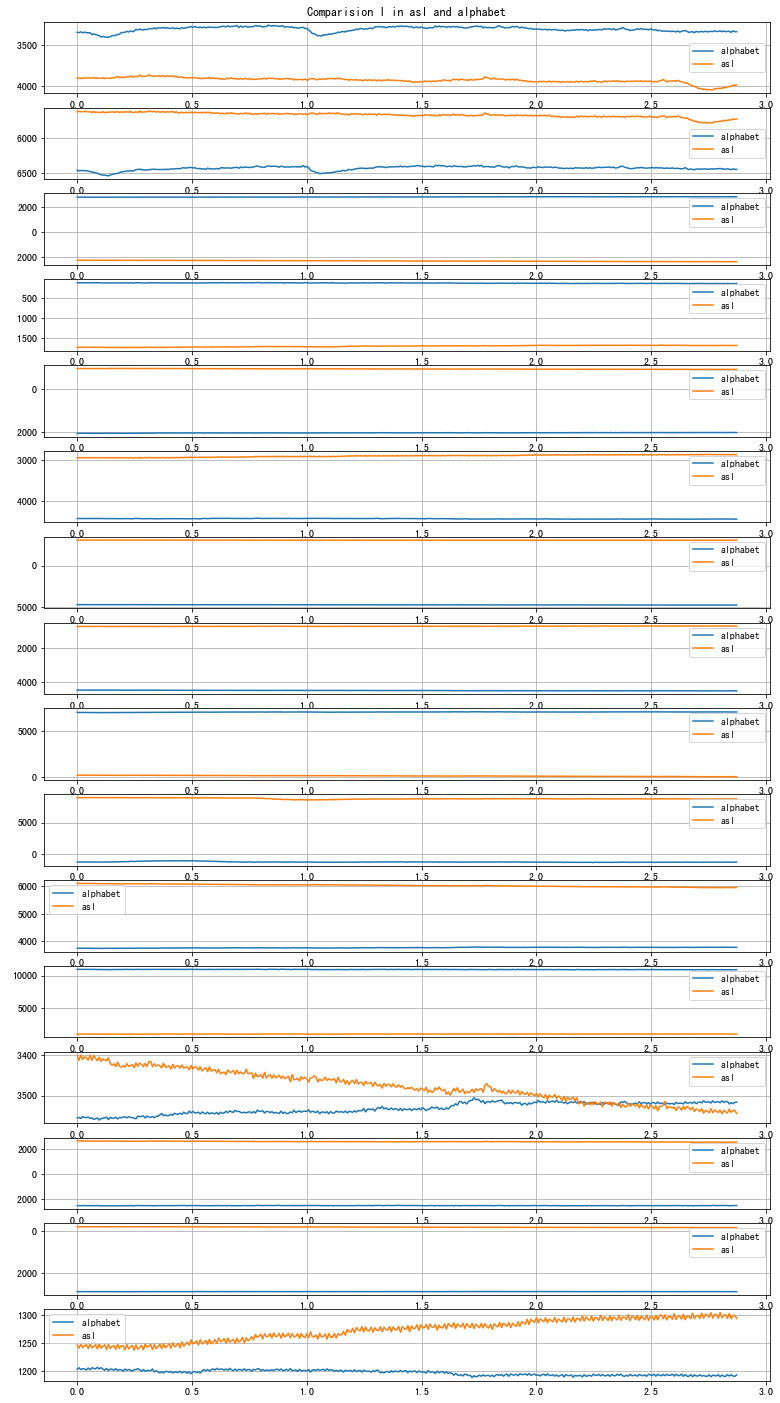

In [6]:
fig, ax = plt.subplots(16, figsize=(13,25))
k = 0
sample_rate = 125
time = np.arange(2643-2283)/ sample_rate

for name in plot_names:

    ax[k].plot(time,alphabet_list[0][name][2283:2643], label='alphabet')
    ax[k].plot(time,asl_list[0][name][2283:2643], label='asl')
    ax[k].grid()
    ax[k].legend()
    k +=1

plt.title('Comparision I in asl and alphabet', y=19)
plt.show()

In [7]:
asl_2 = asl_vision[1]
asl_2

(0, (3064, 3424), 'vision', 'asl', 6, 'F')

In [8]:
alphabet_2 = alphabet_vision[1]
alphabet_2

(0, (3064, 3424), 'vision', 'alphabet', 6, 'F')

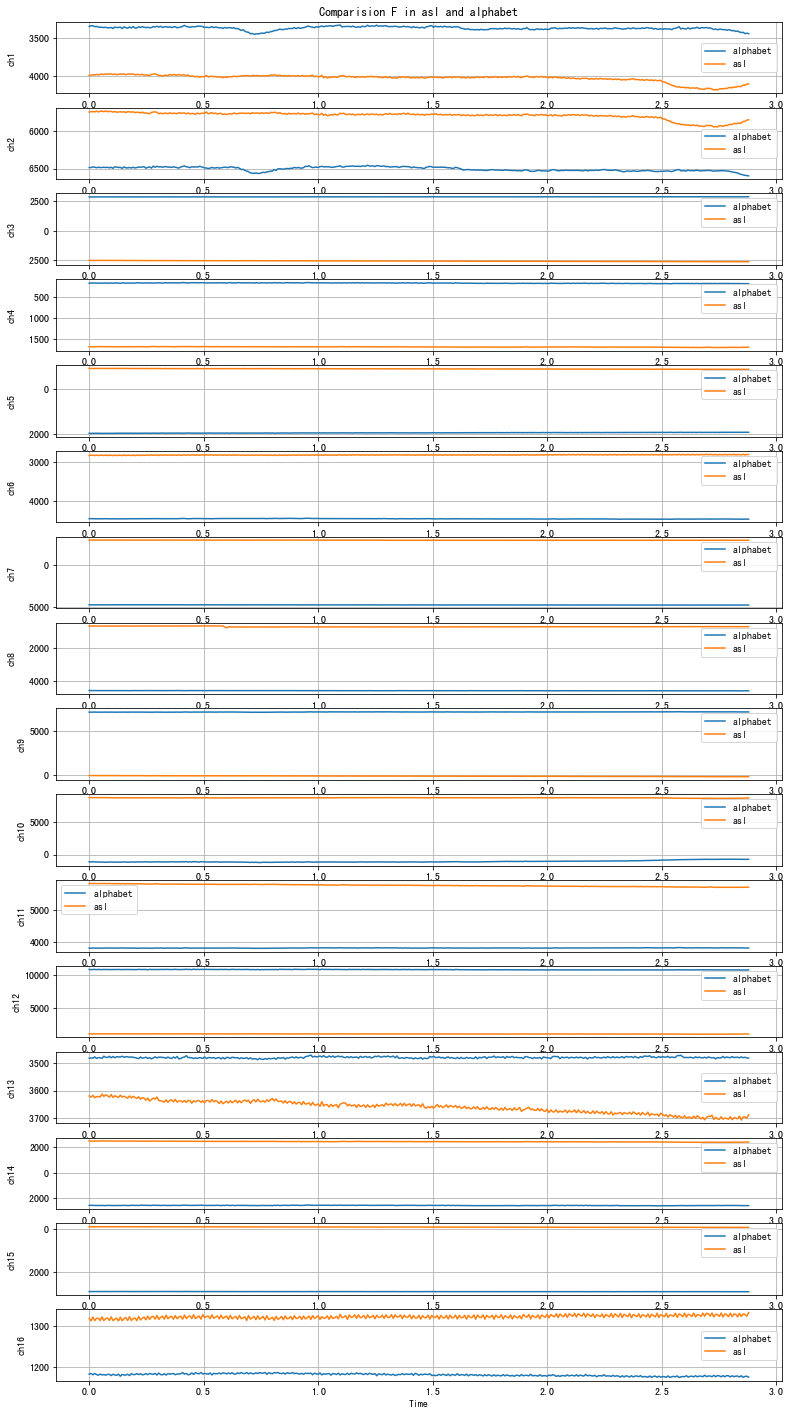

In [10]:
fig, ax = plt.subplots(16, figsize=(13,25))
k = 0
sample_rate = 125
time = np.arange(3425-3064)/ sample_rate

for name in plot_names:

    ax[k].plot(time,alphabet_list[0][name][3064:3425], label='alphabet')
    ax[k].plot(time,asl_list[0][name][3064:3425], label='asl')
    ax[k].set_ylabel(name)
    ax[k].set_xlabel('Time')
    ax[k].grid()
    ax[k].legend()
    k +=1

plt.title('Comparision F in asl and alphabet', y=19)
plt.show()

We can find that the data of channel 13+16 more turbulent, but the data does not see many correlations

### Compare alphabet vision and alphabet imagination

In [11]:
alphabet_1_img = alphabet_imagination[0]
alphabet_1_img

(0, (2643, 3063), 'imagination', 'alphabet', 9, 'I')

In [12]:
3063-2643

420

In [13]:
2283-2642

-359

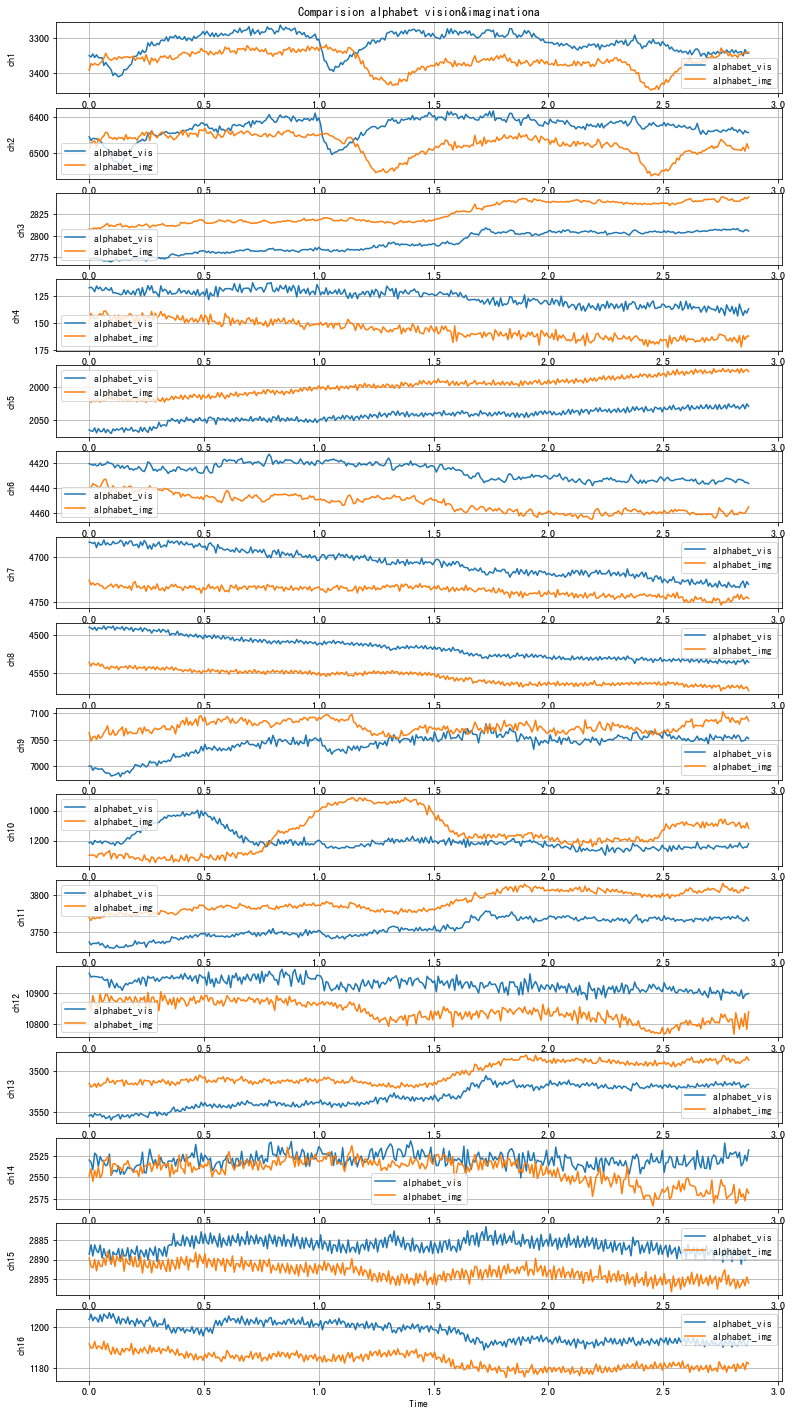

In [15]:
fig, ax = plt.subplots(16, figsize=(13,25))
k = 0
sample_rate = 125
time = np.arange(2643-2283)/ sample_rate

for name in plot_names:

    ax[k].plot(time,alphabet_list[0][name][2283:2643], label='alphabet_vis')
    ax[k].plot(time,alphabet_list[0][name][3064-360:3064], label='alphabet_img')
    ax[k].set_ylabel(name)
    ax[k].set_xlabel('Time')
    ax[k].grid()
    ax[k].legend()
    k +=1

plt.title('Comparision alphabet vision&imaginationa', y=19)
plt.show()

The asl data seems all vibrates a lot, and we can find there might be a relation between those signals

### Compare asl vision and asl imagination


In [16]:
asl_1_img = asl_imagination[0]
asl_1_img

(0, (2643, 3063), 'imagination', 'asl', 9, 'I')

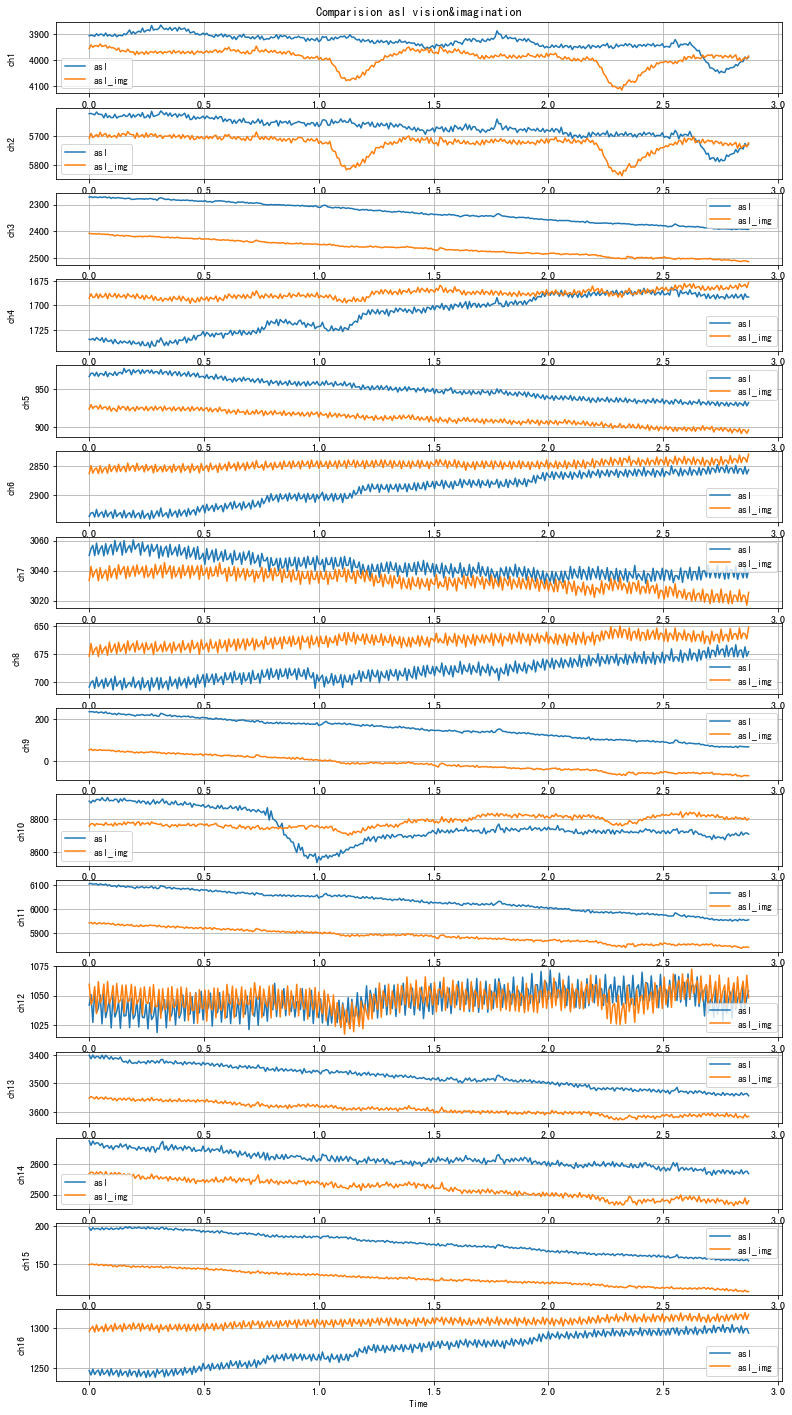

In [17]:
fig, ax = plt.subplots(16, figsize=(13,25))
k = 0
sample_rate = 125
time = np.arange(2643-2283)/ sample_rate

for name in plot_names:

    ax[k].plot(time,asl_list[0][name][2283:2643], label='asl')
    ax[k].plot(time,asl_list[0][name][3064-360:3064], label='asl_img')
    ax[k].set_ylabel(name)
    ax[k].set_xlabel('Time')
    ax[k].grid()
    ax[k].legend()
    k +=1

plt.title('Comparision asl vision&imagination', y=19)
plt.show()

### Compare alphabet imagination vision and asl imagination

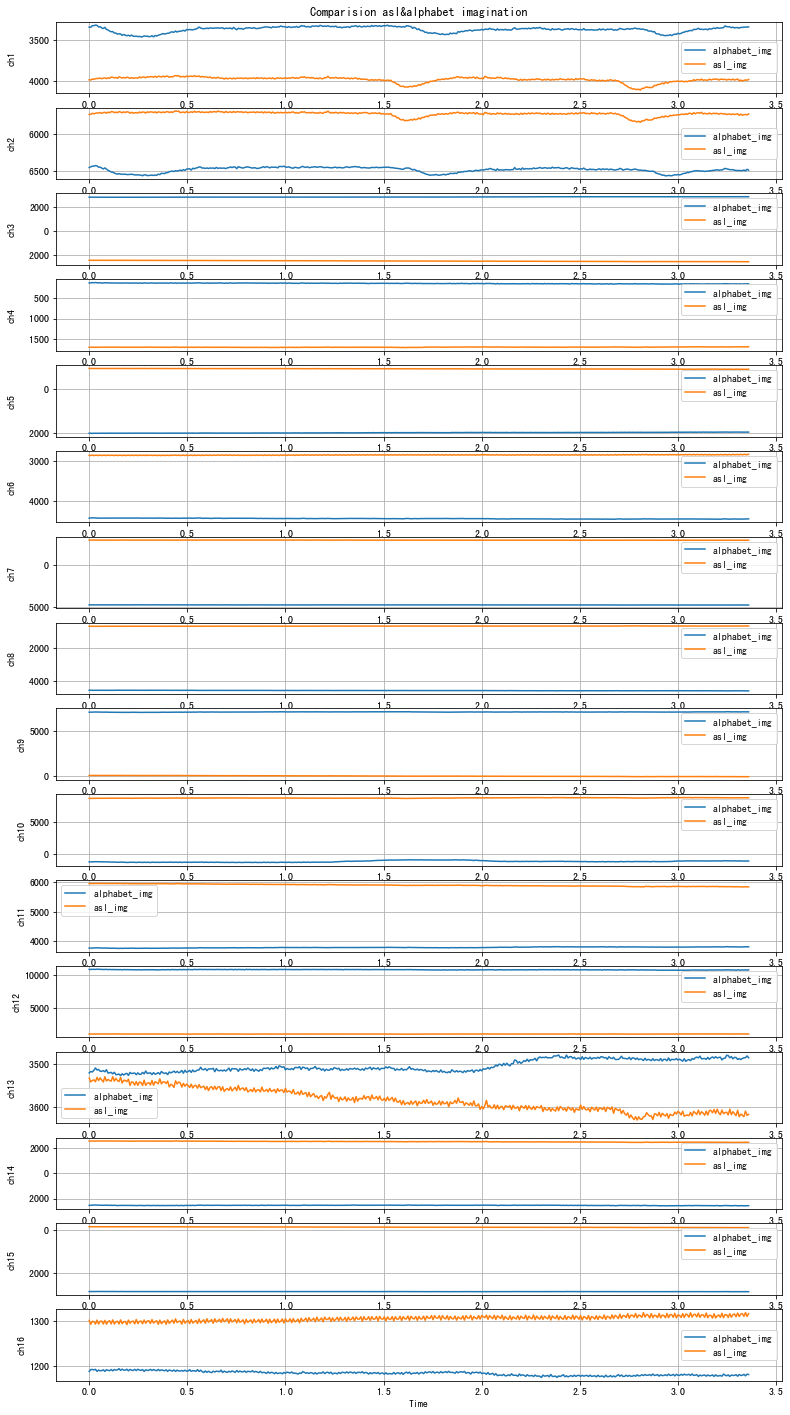

In [18]:
fig, ax = plt.subplots(16, figsize=(13,25))
k = 0
sample_rate = 125
time = np.arange(3064-2643)/ sample_rate

for name in plot_names:

    ax[k].plot(time,alphabet_list[0][name][2643:3064], label='alphabet_img')
    ax[k].plot(time,asl_list[0][name][2643:3064], label='asl_img')
    ax[k].set_ylabel(name)
    ax[k].set_xlabel('Time')
    ax[k].grid()
    ax[k].legend()
    k +=1

plt.title('Comparision asl&alphabet imagination', y=19)
plt.show()

### Compare same alphabet imagination / vision

check the labels_alphabets_1.txt, the following I position are 35, 79, 111, 112

In [19]:
alphabet_1

(0, (2283, 2642), 'vision', 'alphabet', 9, 'I')

In [20]:
alphabet_2 = alphabet_vision[34]
alphabet_2

(0, (28255, 28615), 'vision', 'alphabet', 9, 'I')

In [21]:
alphabet_3 = alphabet_vision[78]
alphabet_3

(0, (61803, 62222), 'vision', 'alphabet', 9, 'I')

In [22]:
alphabet_4 = alphabet_vision[110]
alphabet_4

(0, (86272, 86632), 'vision', 'alphabet', 9, 'I')

In [23]:
alphabet_5 = alphabet_vision[111]
alphabet_5

(0, (86993, 87413), 'vision', 'alphabet', 9, 'I')

In [24]:
max(2283-2642, 28255-28615, 61803-62222, 86272-86632, 86993-87413)

-359

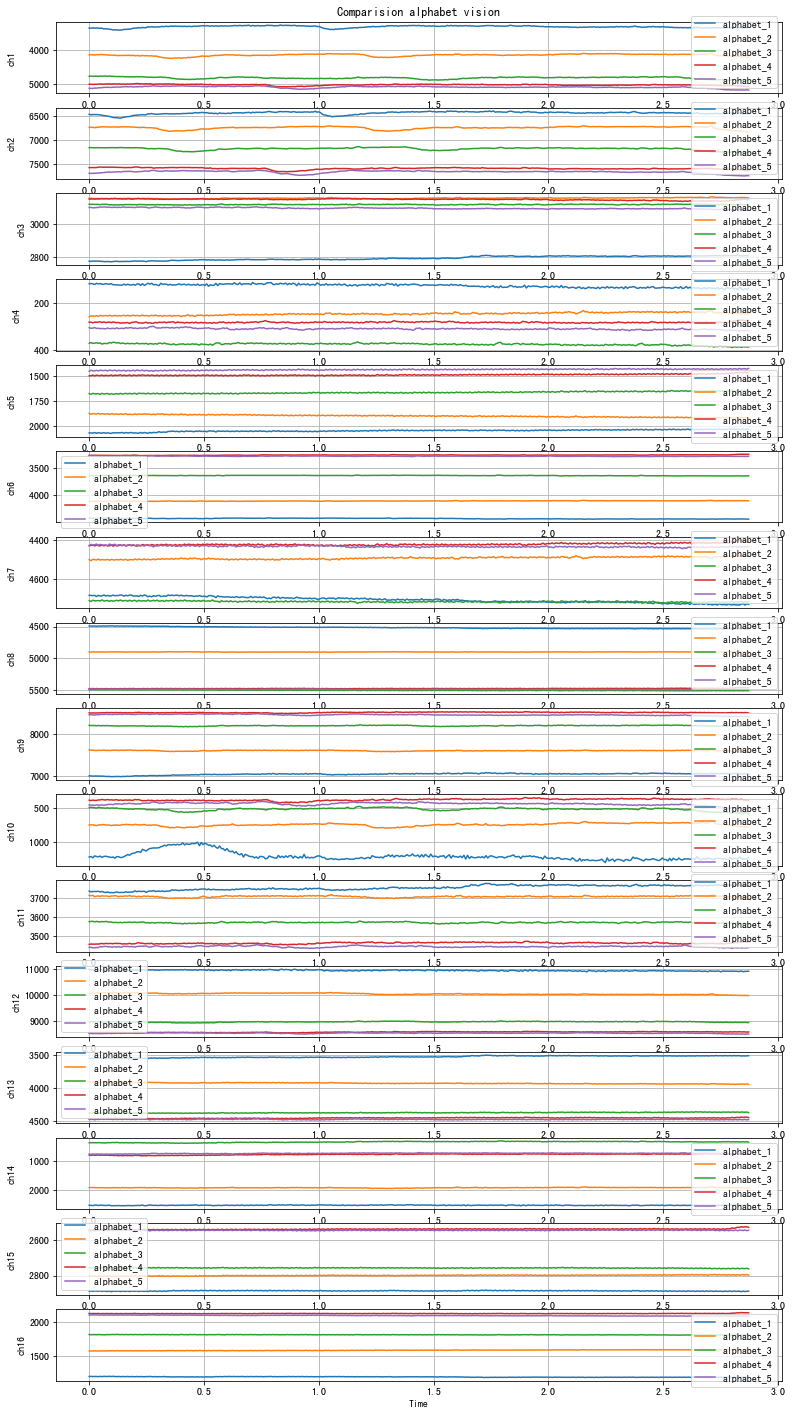

In [25]:
fig, ax = plt.subplots(16, figsize=(13,25))
k = 0
sample_rate = 125
time = np.arange(360)/ sample_rate

for name in plot_names:

    ax[k].plot(time,alphabet_list[0][name][2642-359:2643], label='alphabet_1')
    ax[k].plot(time,alphabet_list[0][name][28615-359:28616], label='alphabet_2')
    ax[k].plot(time,alphabet_list[0][name][62222-359:62223], label='alphabet_3')
    ax[k].plot(time,alphabet_list[0][name][86632-359:86633], label='alphabet_4')
    ax[k].plot(time,alphabet_list[0][name][87413-359:87414], label='alphabet_5')
    ax[k].set_ylabel(name)
    ax[k].set_xlabel('Time')
    ax[k].grid()
    ax[k].legend()
    k +=1

plt.title('Comparision alphabet vision', y=19)
plt.show()

In [26]:
alphabet_1_img

(0, (2643, 3063), 'imagination', 'alphabet', 9, 'I')

In [27]:
alphabet_2_img = alphabet_imagination[34]
alphabet_2_img

(0, (28616, 28975), 'imagination', 'alphabet', 9, 'I')

In [28]:
alphabet_3_img = alphabet_imagination[78]
alphabet_3_img

(0, (62223, 62583), 'imagination', 'alphabet', 9, 'I')

In [29]:
alphabet_4_img = alphabet_imagination[110]
alphabet_4_img

(0, (86633, 86992), 'imagination', 'alphabet', 9, 'I')

In [30]:
alphabet_5_img = alphabet_imagination[111]
alphabet_5_img

(0, (87414, 87774), 'imagination', 'alphabet', 9, 'I')

In [32]:
max(2643-3063, 28616-28975, 62223-62583, 86633-86992, 87414-87774)

-359

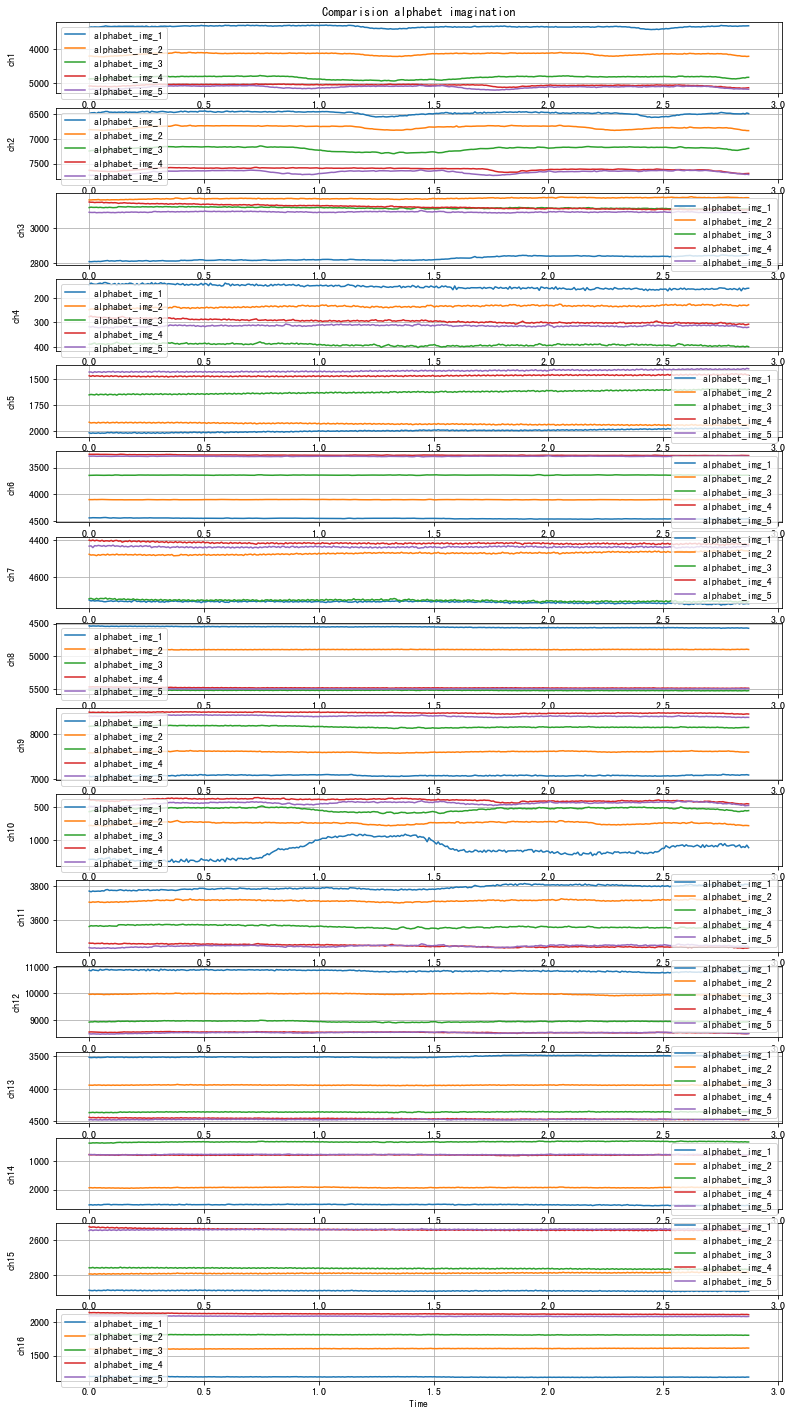

In [33]:
fig, ax = plt.subplots(16, figsize=(13,25))
k = 0
sample_rate = 125
time = np.arange(360)/ sample_rate

for name in plot_names:

    ax[k].plot(time,alphabet_list[0][name][3063-359:3064], label='alphabet_img_1')
    ax[k].plot(time,alphabet_list[0][name][28975-359:28976], label='alphabet_img_2')
    ax[k].plot(time,alphabet_list[0][name][62583-359:62584], label='alphabet_img_3')
    ax[k].plot(time,alphabet_list[0][name][86992-359:86993], label='alphabet_img_4')
    ax[k].plot(time,alphabet_list[0][name][87774-359:87775], label='alphabet_img_5')
    ax[k].set_ylabel(name)
    ax[k].set_xlabel('Time')
    ax[k].grid()
    ax[k].legend()
    k +=1

plt.title('Comparision alphabet imagination', y=19)
plt.show()

### Compare same asl imagination / vision

In [34]:
asl_1

(0, (2283, 2642), 'vision', 'asl', 9, 'I')

In [35]:
asl_2 = asl_vision[34]
asl_2

(0, (28255, 28615), 'vision', 'asl', 9, 'I')

In [36]:
asl_3 = asl_vision[78]
asl_3

(0, (61804, 62224), 'vision', 'asl', 9, 'I')

In [37]:
asl_4 = asl_vision[110]
asl_4

(0, (86273, 86633), 'vision', 'asl', 9, 'I')

In [38]:
asl_5 = asl_vision[111]
asl_5

(0, (86995, 87415), 'vision', 'asl', 9, 'I')

In [39]:
max(2283-2642, 28255-28615, 61804-62224, 86273-86633, 86995-87415)

-359

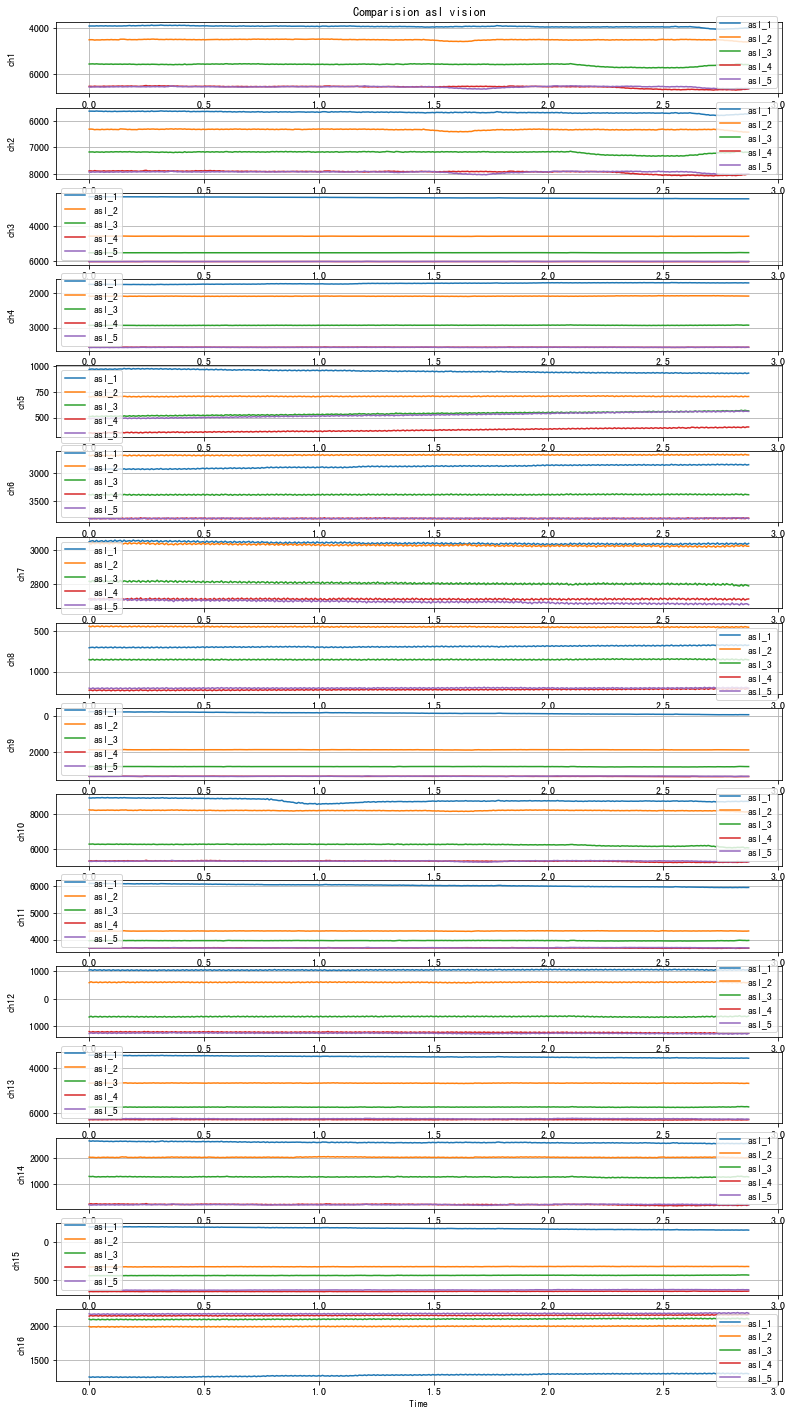

In [40]:
fig, ax = plt.subplots(16, figsize=(13,25))
k = 0
sample_rate = 125
time = np.arange(360)/ sample_rate

for name in plot_names:

    ax[k].plot(time,asl_list[0][name][2642-359:2643], label='asl_1')
    ax[k].plot(time,asl_list[0][name][28615-359:28616], label='asl_2')
    ax[k].plot(time,asl_list[0][name][62224-359:62225], label='asl_3')
    ax[k].plot(time,asl_list[0][name][86633-359:86634], label='asl_4')
    ax[k].plot(time,asl_list[0][name][87415-359:87416], label='asl_5')
    ax[k].set_ylabel(name)
    ax[k].set_xlabel('Time')
    ax[k].grid()
    ax[k].legend()
    k +=1

plt.title('Comparision asl vision', y=19)
plt.show()

In [41]:
asl_1_img

(0, (2643, 3063), 'imagination', 'asl', 9, 'I')

In [42]:
asl_2_img = asl_imagination[34]
asl_2_img 

(0, (28616, 28975), 'imagination', 'asl', 9, 'I')

In [43]:
asl_3_img = asl_imagination[78]
asl_3_img 

(0, (62225, 62585), 'imagination', 'asl', 9, 'I')

In [44]:
asl_4_img = asl_imagination[110]
asl_4_img 

(0, (86634, 86994), 'imagination', 'asl', 9, 'I')

In [45]:
asl_5_img = asl_imagination[111]
asl_5_img 

(0, (87416, 87775), 'imagination', 'asl', 9, 'I')

In [46]:
max(2643-3063, 28616-28975, 62225-62585, 86634-86994, 87416-87775)

-359

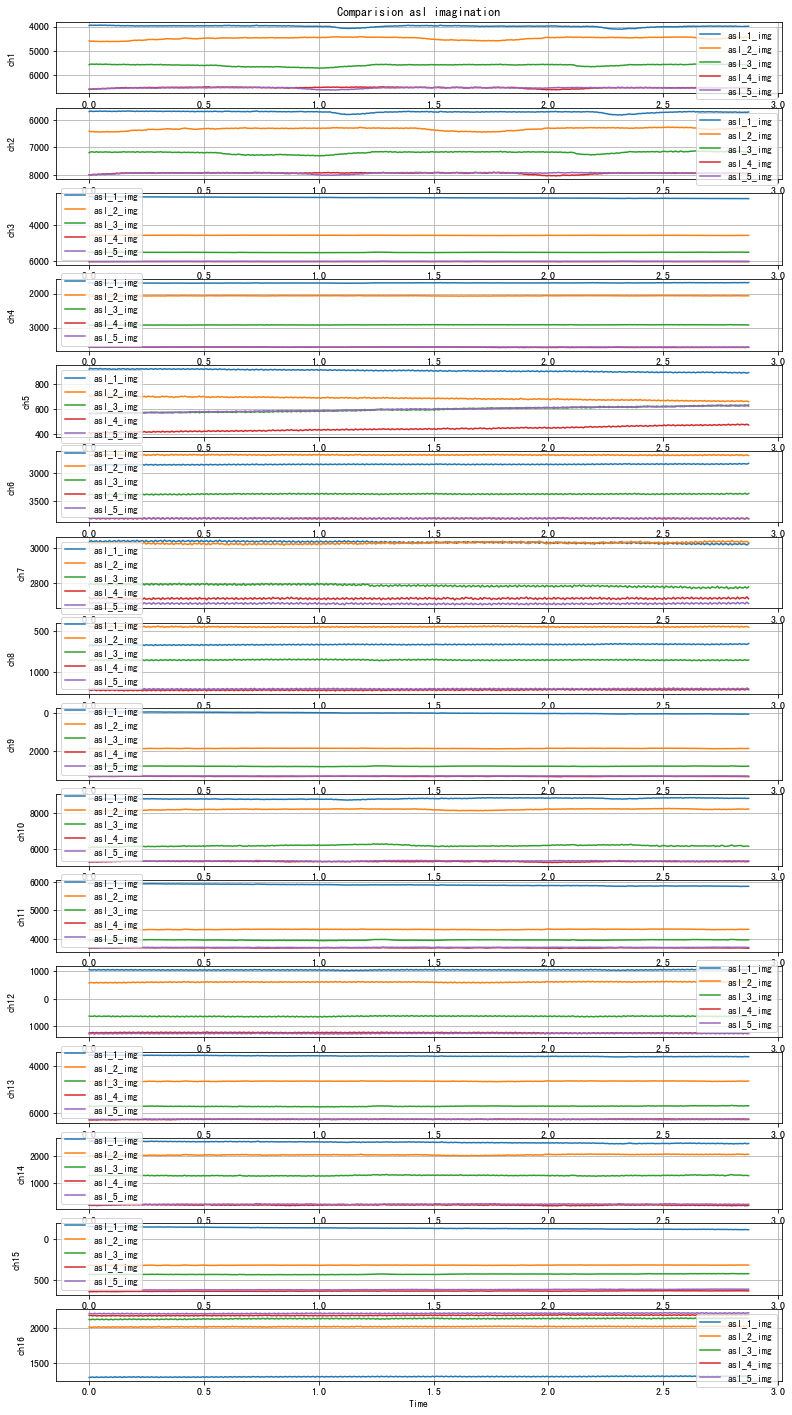

In [47]:
fig, ax = plt.subplots(16, figsize=(13,25))
k = 0
sample_rate = 125
time = np.arange(360)/ sample_rate

for name in plot_names:

    ax[k].plot(time,asl_list[0][name][3063-359:3064], label='asl_1_img')
    ax[k].plot(time,asl_list[0][name][28975-359:28976], label='asl_2_img')
    ax[k].plot(time,asl_list[0][name][62585-359:62586], label='asl_3_img')
    ax[k].plot(time,asl_list[0][name][86994-359:86995], label='asl_4_img')
    ax[k].plot(time,asl_list[0][name][87775-359:87776], label='asl_5_img')
    ax[k].set_ylabel(name)
    ax[k].set_xlabel('Time')
    ax[k].grid()
    ax[k].legend()
    k +=1

plt.title('Comparision asl imagination', y=19)
plt.show()

In general, the specific numerical relationship cannot and cannot be obtained from the image, but from the comparison of some visual and imaginary signals, it seems that some hidden relationships can be obtained, but if you look at the correct value of a certain letter For 5 visions or 5 imaginations, we can't see many common features. In the next part, we will use some systematic feature extraction and comparison methods to compare.

The whole process above can be encapsulated as a function for drawing(in pipelines tools.py)

In [56]:
def plot_intervals(intervals_list,alphabet_list, asl_list, savefig_name="comparision.png", need_uV=True):
    """
    # item in intervals_list (0, (86634, 86994), 'imagination', 'asl', 9, 'I')
    
    """
    
    plot_names=['ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6', 'ch7', 'ch8','ch9', 'ch10',
         'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch16']
    sample_rate = 125
    
    # find minest length
    lengths_list = list()
    for item in intervals_list:
        lengths_list.append(item[1][-1]-item[1][0])
    
    min_length = min(lengths_list)+1
    # print(min_length)
        
    fig, ax = plt.subplots(16, figsize=(13,25))
    k = 0
    time = np.arange(min_length)/ sample_rate

    for name in plot_names:
        count = 0 
        for item in intervals_list:
            
            if item[3]=='asl':
                current_label = item[3]+'_'+item[2]+'_'+item[-1]+'_'+str(count)
                if need_uV:
                    ax[k].plot(time,asl_list[item[0]][name][item[1][-1]-359:item[1][-1]+1], label=current_label)
                else:
                    ax[k].plot(time,asl_list[item[0]][name][item[1][-1]-359:item[1][-1]+1]/1000, label=current_label)         
            
            else:
                current_label = item[3]+'_'+item[2]+'_'+item[-1]+'_'+str(count)
                if need_uV:
                    ax[k].plot(time,alphabet_list[item[0]][name][item[1][-1]-359:item[1][-1]+1], label=current_label)
                else:
                    ax[k].plot(time,alphabet_list[item[0]][name][item[1][-1]-359:item[1][-1]+1]/1000, label=current_label)   
            count+= 1 
        
        if need_uV:
            ax[k].set_ylabel(name+'-uV')
        else:
            ax[k].set_ylabel(name+'-V')
        ax[k].set_xlabel('Time\(s)')
        ax[k].grid()
        ax[k].legend()
        k += 1
        

    plt.title('Comparision asl/alphabet imagination/vision ', y=19)
    # plt.show()
    fig.savefig(savefig_name)
    
    
    

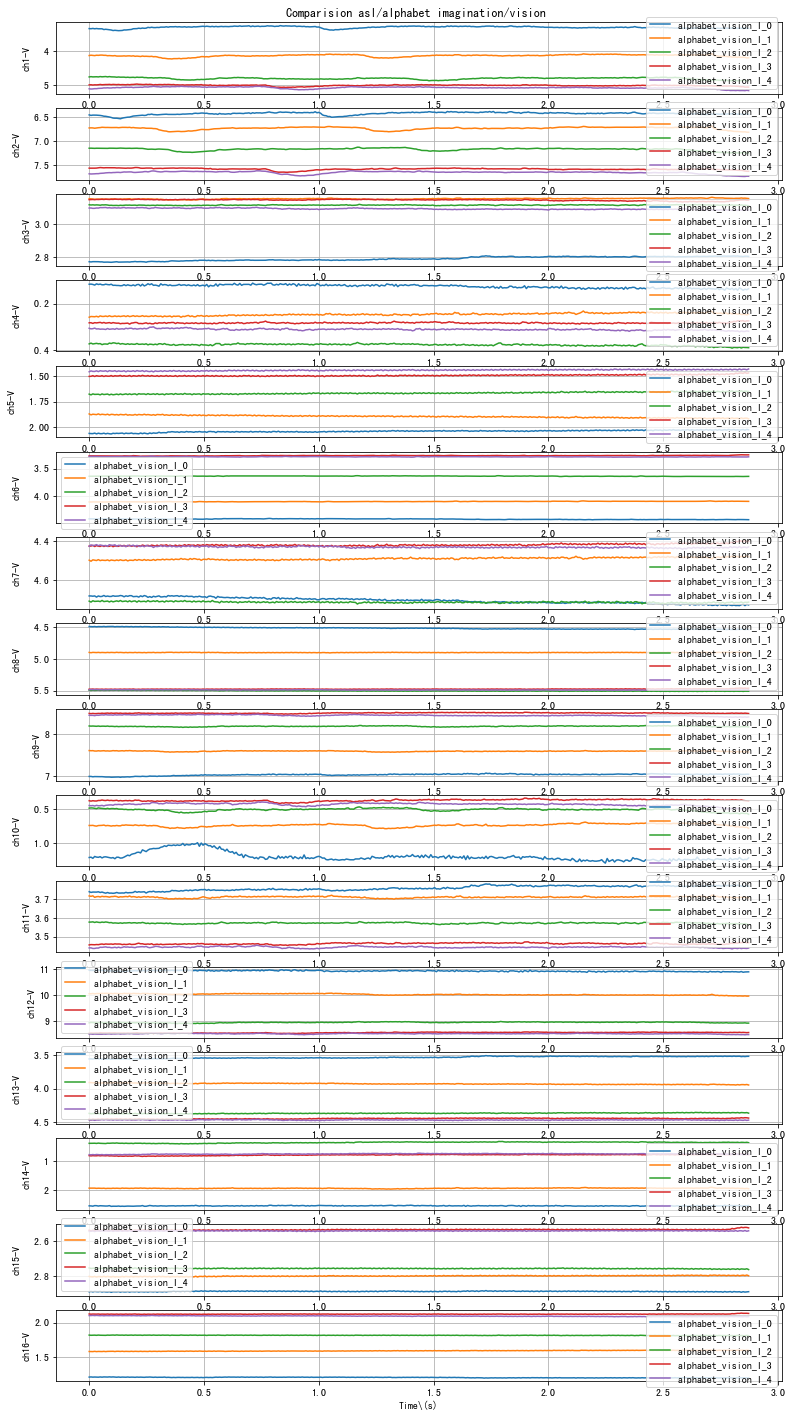

In [57]:
plot_intervals([alphabet_1, alphabet_2, alphabet_3, alphabet_4, alphabet_5], alphabet_list, asl_list, need_uV=False)